# Predicting Flight Delays: Exploratory Data Analysis, Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('ticks')

In [2]:
flights_df = pd.read_csv('../data/data-feature/flights_data_merge.csv')
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

In [3]:
weather_df = pd.read_csv('../data/weather_df.csv')
weather_df.head()

,Unnamed: 0,iata_code,date,min_temp,max_temp,avg_temp,total_snowcm,windspeed_kmhr,precip_mm,humidity,visibility,cloud_cover,heat_indexC,wind_chillC,wind_gust,feels_like,weather_description
0,0,ATL,2018-01-01,-17,-10,-14,0.0,12,0.0,45,10,21,-14,-21,16,-21,Partly cloudy
1,1,ATL,2018-01-02,-13,-5,-9,0.0,9,0.0,36,10,49,-10,-14,13,-14,Overcast
2,2,ATL,2018-01-03,-8,2,-2,0.0,13,0.0,54,10,6,-4,-8,23,-8,Sunny
3,3,ATL,2018-01-04,-7,4,-2,0.0,11,0.0,56,10,17,-3,-6,18,-6,Partly cloudy
4,4,ATL,2018-01-05,-3,5,0,0.0,13,0.0,63,10,12,-1,-5,23,-5,Sunny


In [4]:
weather_df = weather_df[['iata_code', 'date', 'avg_temp', 'precip_mm', 'humidity', 'visibility', 'windspeed_kmhr', 'total_snowcm', 'weather_description']]
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d')
weather_df.head()

,iata_code,date,avg_temp,precip_mm,humidity,visibility,windspeed_kmhr,total_snowcm,weather_description
0,ATL,2018-01-01,-14,0.0,45,10,12,0.0,Partly cloudy
1,ATL,2018-01-02,-9,0.0,36,10,9,0.0,Overcast
2,ATL,2018-01-03,-2,0.0,54,10,13,0.0,Sunny
3,ATL,2018-01-04,-2,0.0,56,10,11,0.0,Partly cloudy
4,ATL,2018-01-05,0,0.0,63,10,13,0.0,Sunny


In [5]:
airport_codes = list(weather_df['iata_code'].unique())

In [6]:
flights_both = flights_df[(flights_df['origin'].isin(airport_codes)) & (flights_df['dest'].isin(airport_codes))]

In [7]:
origin_weather = weather_df.rename(columns={'iata_code': 'origin'})
arrival_weather = weather_df.rename(columns={'iata_code': 'dest'})
flights_both.rename(columns={'fl_date':'date'}, inplace=True)

In [8]:
flights_both = pd.merge(flights_both, origin_weather, on=['date', 'origin'], how='inner')
flights_both = pd.merge(flights_both, arrival_weather, on=['date', 'dest'], how='inner')
flights_both.columns

Index(['Unnamed: 0', 'date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'avg_temp_x', 'precip_mm_x',
       'humidity_x', 'visibility_x', 'windspeed_kmhr_x', 'total_snowcm_x',
       'weather_description_x', 'avg_temp_y', 'precip_mm_y', 'humidity_y',
       'visibility_y', 'windspeed_kmhr_y', 'total_snowcm_y',
       'we

In [9]:
flights_both.to_csv('../data/data-feature/flights-weather-merge.csv')

In [10]:
flights_both.head()

,Unnamed: 0,date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,windspeed_kmhr_x,total_snowcm_x,weather_description_x,avg_temp_y,precip_mm_y,humidity_y,visibility_y,windspeed_kmhr_y,total_snowcm_y,weather_description_y
0,8,2018-06-21,AA,AA,AA,1263,AA,N158AN,1263,11298,...,24,0.0,Sunny,26,0.0,52,10,24,0.0,Sunny
1,78570,2018-06-21,AA,AA,AA,1105,AA,N933AM,1105,11298,...,24,0.0,Sunny,26,0.0,52,10,24,0.0,Sunny
2,452452,2018-06-21,DL,DL_CODESHARE,DL,5941,YX,N879RW,5941,11298,...,24,0.0,Sunny,26,0.0,52,10,24,0.0,Sunny
3,27858,2018-06-21,DL,DL_CODESHARE,DL,6136,YX,N878RW,6136,11278,...,24,0.0,Sunny,26,0.0,52,10,24,0.0,Sunny
4,310216,2018-06-21,AA,AA_CODESHARE,AA,4752,YX,N109HQ,4752,11278,...,24,0.0,Sunny,26,0.0,52,10,24,0.0,Sunny


## Looking at Weather Features

In [11]:
flights_weather = flights_both[['date', 'origin', 'dest', 'dep_delay', 'arr_delay', 'avg_temp_x', 'precip_mm_x', 'humidity_x', 'visibility_x', 'total_snowcm_x', 
                                'windspeed_kmhr_x','weather_description_x','avg_temp_y', 'precip_mm_y', 'humidity_y', 'visibility_y', 'total_snowcm_y', 'windspeed_kmhr_y',
                                'weather_description_y']]

flights_weather.columns = ['date', 'origin', 'dest','dep_delay', 'arr_delay', 'dep_avg_temp', 'dep_precip_mm', 'dep_humidity', 'dep_visibility', 'dep_total_snowcm',
                          'dep_windspeed','dep_weather_description', 'arr_avg_temp', 'arr_precip_mm', 'arr_humidity', 'arr_visibility', 'arr_total_snowcm', 'arr_windspeed',
                          'arr_weather_description']


*Lets observe how each variable is related to arrival delay!*

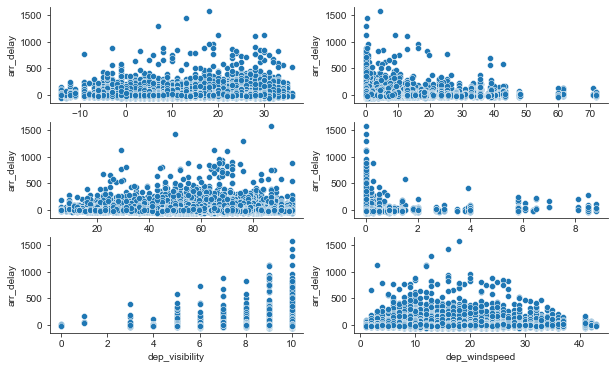

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))

sns.scatterplot(x='dep_avg_temp', y='arr_delay', data=flights_weather, ax=ax[0][0])
sns.scatterplot(x='dep_precip_mm', y='arr_delay', data=flights_weather, ax=ax[0][1])
sns.scatterplot(x='dep_humidity', y='arr_delay', data=flights_weather, ax=ax[1][0])
sns.scatterplot(x='dep_total_snowcm', y='arr_delay', data=flAights_weather, ax=ax[1][1])
sns.scatterplot(x='dep_visibility', y='arr_delay', data=flights_weather, ax=ax[2][0])
sns.scatterplot(x='dep_windspeed', y='arr_delay', data=flights_weather, ax=ax[2][1])
sns.despine()
plt.show()

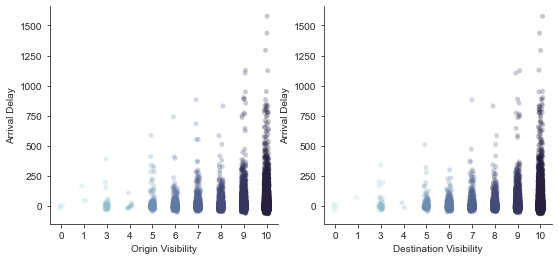

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))


sns.stripplot(x="dep_visibility", y="arr_delay",
              data=flights_weather, dodge=True, alpha=.25, zorder=1, palette="ch:start=.2,rot=-.3", ax=ax[0])
ax[0].set(xlabel='Origin Visibility', ylabel='Arrival Delay')
sns.stripplot(x="arr_visibility", y="arr_delay",
              data=flights_weather, dodge=True, alpha=.25, zorder=1, palette="ch:start=.2,rot=-.3", ax=ax[1])
ax[1].set(xlabel='Destination Visibility', ylabel='Arrival Delay')
sns.despine()

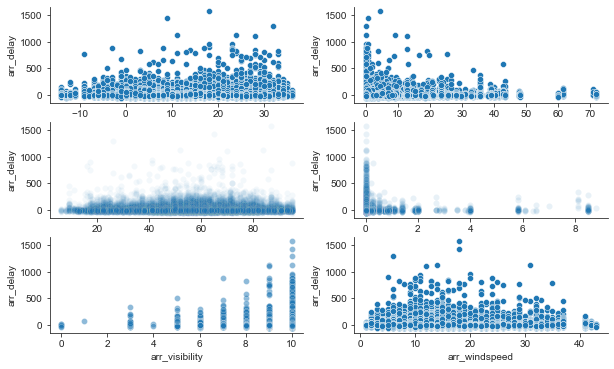

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))

sns.scatterplot(x='arr_avg_temp', y='arr_delay', data=flights_weather, ax=ax[0][0])
sns.scatterplot(x='arr_precip_mm', y='arr_delay', data=flights_weather, ax=ax[0][1])
sns.scatterplot(x='arr_humidity', y='arr_delay', data=flights_weather, ax=ax[1][0], alpha=0.05)
sns.scatterplot(x='arr_total_snowcm', y='arr_delay', data=flights_weather, ax=ax[1][1], alpha=0.1)
sns.scatterplot(x='arr_visibility', y='arr_delay', data=flights_weather, ax=ax[2][0], alpha=0.5)
sns.scatterplot(x='arr_windspeed', y='arr_delay', data=flights_weather, ax=ax[2][1])
sns.despine()
plt.show()

In [14]:
flights_weather['dep_weather_description'].unique()

array(['Sunny', 'Patchy rain possible', 'Cloudy', 'Partly cloudy',
       'Patchy heavy snow', 'Overcast', 'Patchy light drizzle',
       'Torrential rain shower', 'Thundery outbreaks possible',
       'Light drizzle', 'Patchy light rain with thunder',
       'Light rain shower', 'Moderate rain', 'Patchy light rain', 'Mist',
       'Light rain', 'Heavy snow', 'Blizzard', 'Light snow',
       'Moderate or heavy rain shower', 'Moderate rain at times',
       'Blowing snow', 'Patchy light snow', 'Ice pellets', 'Heavy rain',
       'Light sleet', 'Heavy rain at times',
       'Moderate or heavy freezing rain', 'Moderate snow',
       'Patchy moderate snow', 'Moderate or heavy rain with thunder',
       'Fog', 'Patchy freezing drizzle possible', 'Patchy snow possible'],
      dtype=object)

In [15]:
flights_weather.groupby('dep_weather_description')[['dep_delay', 'arr_delay']].mean()

,dep_delay,arr_delay
dep_weather_description,,
Blizzard,8.583333,1.564394
Blowing snow,5.962366,-2.478495
Cloudy,9.003559,2.208501
Fog,-1.089552,-11.955224
Heavy rain,9.880597,2.865672
Heavy rain at times,27.387097,21.182796
Heavy snow,12.446377,9.472464
Ice pellets,19.735135,10.956522
Light drizzle,7.743316,1.970430


In [16]:
flights_weather.groupby('arr_weather_description')[['dep_delay', 'arr_delay']].mean()

,dep_delay,arr_delay
arr_weather_description,,
Blizzard,7.055147,2.084871
Blowing snow,4.982659,-3.190751
Cloudy,9.579334,3.547391
Fog,7.016949,-5.322034
Heavy rain,9.093220,2.745763
Heavy rain at times,20.583333,15.093750
Heavy snow,8.340000,3.212034
Ice pellets,16.974093,8.880208
Light drizzle,8.320210,1.870712


In [17]:
def is_thunder(weather_desc):
    if ('thunder' in weather_desc.lower()):
        return 1
    else:
        return 0

In [18]:
def is_cloudy(weather_desc):
    if ('cloudy' in weather_desc.lower()) or ('fog' in weather_desc.lower()) or ('mist' in weather_desc.lower()):
        return 1
    else:
        return 0

In [19]:
def is_snow(weather_desc):
    if('snow' in weather_desc.lower()) or ('blizzard' in weather_desc.lower()) or ('ice' in weather_desc.lower()) or ('sleet' in weather_desc.lower()) or ('freezing' in weather_desc.lower()):
        return 1
    else:
        return 0

In [20]:
def is_rainy(weather_desc):
    if('rain' in weather_desc.lower()) or ('drizzle' in weather_desc.lower()):
        return 1
    else:
        return 0

In [21]:
flights_weather['dep_thunder'] = flights_weather['dep_weather_description'].map(is_thunder)
flights_weather['dep_cloudy'] = flights_weather['dep_weather_description'].map(is_cloudy)
flights_weather['dep_snow'] = flights_weather['dep_weather_description'].map(is_snow)
flights_weather['dep_rainy'] = flights_weather['dep_weather_description'].map(is_rainy)

In [22]:
flights_weather['arr_thunder'] = flights_weather['arr_weather_description'].map(is_thunder)
flights_weather['arr_cloudy'] = flights_weather['arr_weather_description'].map(is_cloudy)
flights_weather['arr_snow'] = flights_weather['arr_weather_description'].map(is_snow)
flights_weather['arr_rainy'] = flights_weather['arr_weather_description'].map(is_rainy)

In [23]:
flights_weather.groupby('dep_thunder')[['arr_delay']].mean()

,arr_delay
dep_thunder,
0,5.444888
1,6.157036


In [24]:
flights_weather.groupby('dep_cloudy')[['arr_delay']].mean()

,arr_delay
dep_cloudy,
0,6.485464
1,2.405760


In [25]:
flights_weather.groupby('dep_snow')[['arr_delay']].mean()

,arr_delay
dep_snow,
0,5.356482
1,8.427996


In [26]:
flights_weather.groupby('dep_rainy')[['arr_delay']].mean()

,arr_delay
dep_rainy,
0,5.145658
1,6.647917


In [27]:
flights_weather.groupby('arr_thunder')[['arr_delay']].mean()

,arr_delay
arr_thunder,
0,5.447243
1,6.153873


In [28]:
flights_weather.groupby('arr_snow')[['arr_delay']].mean()

,arr_delay
arr_snow,
0,5.432166
1,6.780020


In [29]:
flights_weather.groupby('arr_cloudy')[['arr_delay']].mean()

,arr_delay
arr_cloudy,
0,6.209084
1,3.281393


In [30]:
flights_weather.groupby('arr_rainy')[['arr_delay']].mean()

,arr_delay
arr_rainy,
0,5.341407
1,5.997967


In [31]:
flights_weather['arr_total_snowcm'].describe()

count    46183.000000
mean         0.039582
std          0.412983
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.800000
Name: arr_total_snowcm, dtype: float64

In [32]:
bins = [-0.01, 2.2, 4.4, 6.6, 8.8]
arr_totalsnow_bin = flights_weather.groupby(pd.cut(flights_weather['arr_total_snowcm'], bins=bins))[['arr_total_snowcm']].mean()

In [33]:
arr_totalsnow_range = arr_totalsnow_bin['arr_total_snowcm'].to_list()

In [34]:
arr_totalsnow_bin

,arr_total_snowcm
arr_total_snowcm,
"(-0.01, 2.2]",0.016387
"(2.2, 4.4]",3.640000
"(4.4, 6.6]",5.920000
"(6.6, 8.8]",8.441935


In [67]:
def snow_bin(snow):
    if snow >= 0 and snow <= 2.2:
        return 'Low'
    elif snow > 2.2 and snow <= 4.4:
        return 'Medium'
    elif snow > 4.4 and snow <= 6.6:
        return 'High'
    else:
        return 'Heavy'

In [68]:
flights_weather['arr_snow_bin'] = flights_weather['arr_total_snowcm'].map(snow_bin)

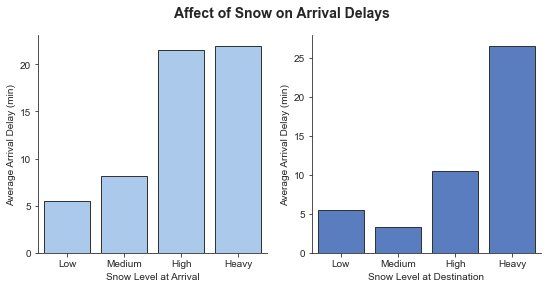

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
sns.set_color_codes('pastel')
sns.barplot(x='dep_snow_bin', y='arr_delay', data=flights_weather, ci=None, color='b', edgecolor='.2', ax=ax[0])
ax[0].set(xlabel='Snow Level at Arrival', ylabel='Average Arrival Delay (min)')
sns.set_color_codes('muted')
sns.barplot(x='arr_snow_bin', y='arr_delay', data=flights_weather, ci=None, color='b', edgecolor='.2', ax=ax[1])
ax[1].set(xlabel='Snow Level at Destination', ylabel='Average Arrival Delay (min)')
fig.suptitle('Affect of Snow on Arrival Delays', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

In [38]:
bins = [-0.01, 2.2, 4.4, 6.6, 8.8]
dep_totalsnow_bin = flights_weather.groupby(pd.cut(flights_weather['dep_total_snowcm'], bins=bins))[['dep_total_snowcm']].mean()

In [39]:
dep_totalsnow_bin

,dep_total_snowcm
dep_total_snowcm,
"(-0.01, 2.2]",0.015926
"(2.2, 4.4]",3.569333
"(4.4, 6.6]",5.938333
"(6.6, 8.8]",8.410169


In [84]:
flights_weather['dep_snow_bin'] = flights_weather['dep_total_snowcm'].map(snow_bin)

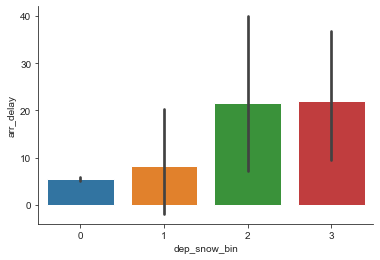

In [41]:
sns.barplot(x='dep_snow_bin', y='arr_delay', data=flights_weather)
sns.despine()
plt.show()

In [42]:
flights_weather['arr_precip_mm'].describe()

count    46183.000000
mean         2.701228
std          7.158462
min          0.000000
25%          0.000000
50%          0.000000
75%          1.600000
max         71.800000
Name: arr_precip_mm, dtype: float64

In [43]:
bins = [0, 9, 18, 27, 36,45, 54,63,72]
arr_precip_bin = flights_weather.groupby(pd.cut(flights_weather['arr_precip_mm'], bins=bins))[['arr_delay']].mean()
dep_precip_bin = flights_weather.groupby(pd.cut(flights_weather['dep_precip_mm'], bins=bins))[['arr_delay']].mean()

In [44]:
arr_precip_bin

,arr_delay
arr_precip_mm,
"(0, 9]",5.519992
"(9, 18]",6.647936
"(18, 27]",12.671827
"(27, 36]",9.692771
"(36, 45]",6.316109
"(45, 54]",-4.263158
"(54, 63]",3.610000
"(63, 72]",-4.038462


In [45]:
dep_precip_bin

,arr_delay
dep_precip_mm,
"(0, 9]",5.779726
"(9, 18]",7.146332
"(18, 27]",13.099900
"(27, 36]",12.766017
"(36, 45]",10.386018
"(45, 54]",-6.078431
"(54, 63]",3.880000
"(63, 72]",-1.692308


In [46]:
def precip_bin(precip):
    if precip >= 0 and precip <=18:
        return 0
    elif precip > 18 and precip <=36:
        return 1
    elif precip > 36 and precip <= 54:
        return 2
    else:
        return 3

In [47]:
flights_weather['arr_precip_bin'] = flights_weather['arr_precip_mm'].map(precip_bin)
flights_weather['dep_precip_bin'] = flights_weather['dep_precip_mm'].map(precip_bin)

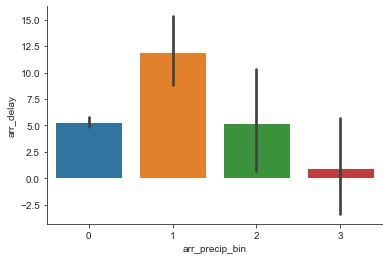

In [48]:
sns.barplot(x='arr_precip_bin', y='arr_delay', data=flights_weather)
sns.despine()
plt.show()

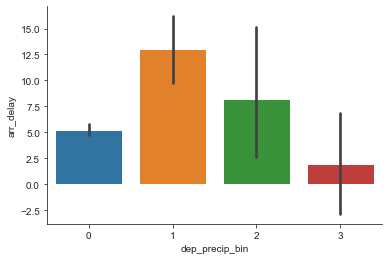

In [49]:
sns.barplot(x='dep_precip_bin', y='arr_delay', data=flights_weather)
sns.despine()
plt.show()

In [50]:
flights_weather['arr_humidity'].describe()

count    46183.000000
mean        58.806054
std         16.740127
min          6.000000
25%         49.000000
50%         60.000000
75%         71.000000
max         95.000000
Name: arr_humidity, dtype: float64

In [51]:
flights_weather['dep_humidity'].describe()

count    46183.000000
mean        58.902193
std         16.661430
min          6.000000
25%         49.000000
50%         60.000000
75%         71.000000
max         95.000000
Name: dep_humidity, dtype: float64

In [52]:
bins = [0, 24, 48, 72, 96]
arr_humid_bin = flights_weather.groupby(pd.cut(flights_weather['arr_humidity'], bins=bins))[['arr_delay']].mean()
dep_humid_bin = flights_weather.groupby(pd.cut(flights_weather['dep_humidity'], bins=bins))[['arr_delay']].mean()

In [53]:
arr_humid_bin

,arr_delay
arr_humidity,
"(0, 24]",9.612534
"(24, 48]",6.546986
"(48, 72]",5.404010
"(72, 96]",3.872281


In [54]:
dep_humid_bin

,arr_delay
dep_humidity,
"(0, 24]",10.750416
"(24, 48]",7.161588
"(48, 72]",5.003334
"(72, 96]",4.179377


In [55]:
def humidity_bin(humidity):
    if humidity >= 0 and humidity <= 24:
        return 0
    elif humidity > 24 and humidity <=48:
        return 1
    elif humidity > 48 and humidity <= 72:
        return 2
    else:
        return 3

In [56]:
flights_weather['dep_humidity_bin'] = flights_weather['dep_humidity'].map(humidity_bin)
flights_weather['arr_humidity_bin'] = flights_weather['arr_humidity'].map(humidity_bin)

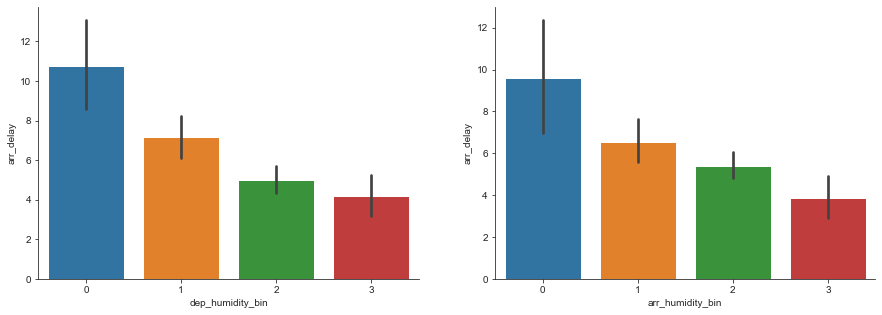

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(x='dep_humidity_bin', y='arr_delay', data=flights_weather, ax=ax[0])
sns.barplot(x='arr_humidity_bin', y='arr_delay', data=flights_weather, ax=ax[1])
sns.despine()
plt.show()

In [58]:
flights_weather['dep_avg_temp'].describe()

count    46183.000000
mean        16.975987
std         10.765528
min        -14.000000
25%          8.000000
50%         19.000000
75%         26.000000
max         36.000000
Name: dep_avg_temp, dtype: float64

In [59]:
flights_weather['arr_avg_temp'].describe()

count    46183.000000
mean        16.935496
std         10.746595
min        -14.000000
25%          8.000000
50%         18.000000
75%         26.000000
max         36.000000
Name: arr_avg_temp, dtype: float64

In [60]:
bins = [-14, -4, 6, 16, 26, 36 ]
arr_temp_bin = flights_weather.groupby(pd.cut(flights_weather['arr_avg_temp'], bins=bins))[['arr_delay']].mean()
dep_temp_bin = flights_weather.groupby(pd.cut(flights_weather['dep_avg_temp'], bins=bins))[['arr_delay']].mean()

In [61]:
arr_temp_bin

,arr_delay
arr_avg_temp,
"(-14, -4]",6.510670
"(-4, 6]",4.056941
"(6, 16]",2.177906
"(16, 26]",7.058169
"(26, 36]",7.626617


In [62]:
dep_temp_bin

,arr_delay
dep_avg_temp,
"(-14, -4]",7.608922
"(-4, 6]",4.150805
"(6, 16]",1.034864
"(16, 26]",7.581568
"(26, 36]",7.859517


In [63]:
def avgtemp(temp):
    if temp >= -14 and temp <= -4:
        return 0
    elif temp > -4 and temp <=6:
        return 1
    elif temp > 6 and temp <= 16:
        return 2
    elif temp > 16 and temp <= 26:
        return 3
    else:
        return 4

In [64]:
flights_weather['dep_avgtemp_bin'] = flights_weather['dep_avg_temp'].map(avgtemp)
flights_weather['arr_avgtemp_bin'] = flights_weather['arr_avg_temp'].map(avgtemp)

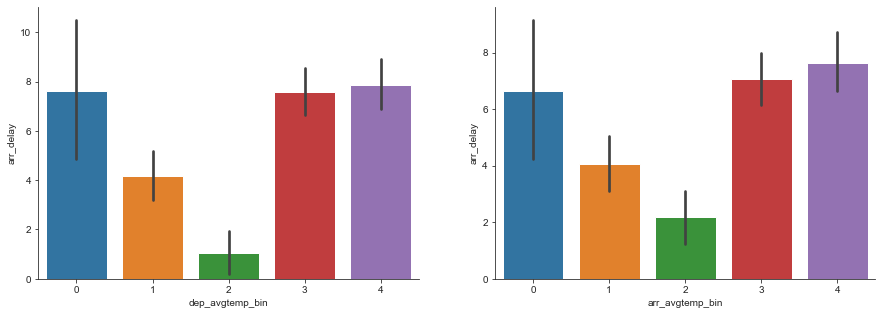

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(x='dep_avgtemp_bin', y='arr_delay', data=flights_weather, ax=ax[0])
sns.barplot(x='arr_avgtemp_bin', y='arr_delay', data=flights_weather, ax=ax[1])
sns.despine()
plt.show()

In [213]:
flights_weather.to_csv('../data/data-feature/flights_weather_feature_engineering.csv')

## Edit Flight Features

In [67]:
airport_codes

['ATL', 'DCA', 'DFW', 'JFK', 'LAX', 'LGA', 'MSP', 'ORD', 'SEA']

In [68]:
flights_df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-03-31,UA,UA,UA,2384,UA,N76288,2384,11618,...,1065,0.0,0.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN
1,1,2018-11-27,DL,DL,DL,1260,DL,N902DN,1260,11884,...,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-09-17,AA,AA_CODESHARE,AA,5906,YV,N912FJ,5906,11298,...,641,0.0,0.0,0.0,0.0,47.0,NaN,NaN,NaN,NaN
3,3,2018-10-19,G4,G4,G4,2272,G4,252NV,2272,10135,...,518,654.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,4,2018-04-24,DL,DL_CODESHARE,DL,5583,EV,N738EV,5583,11042,...,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def extract_features_df(df):
    
    '''
    Extract relevant features from flight dataframe.
        Input: Raw dataframe
        Output: Dataframe with relevant features for analysis
    '''
    
    new_df = df.drop(['branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
                      'op_carrier_fl_num', 'cancellation_code', 'carrier_delay', 'weather_delay', 
                      'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time',
                      'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1).dropna()
    
    new_df = new_df[['fl_date', 'mkt_unique_carrier', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'dep_delay', 
                     'crs_arr_time', 'arr_delay', 'cancelled', 'crs_elapsed_time', 'distance']]

    new_df['fl_date'] = pd.to_datetime(new_df['fl_date'], format='%Y-%m-%d')

    return new_df

In [70]:
flights_df2 = extract_features_df(flights_df)

In [71]:
flights_df2.columns

Index(['fl_date', 'mkt_unique_carrier', 'op_unique_carrier', 'origin', 'dest',
       'crs_dep_time', 'dep_delay', 'crs_arr_time', 'arr_delay', 'cancelled',
       'crs_elapsed_time', 'distance'],
      dtype='object')

In [72]:
flights_df2.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,crs_dep_time,dep_delay,crs_arr_time,arr_delay,cancelled,crs_elapsed_time,distance
0,2018-03-31,UA,UA,EWR,FLL,1705,46.0,2017,38.0,0,192.0,1065
1,2018-11-27,DL,DL,GEG,SLC,544,1.0,847,-10.0,0,123.0,546
2,2018-09-17,AA,YV,DFW,VPS,1650,54.0,1846,47.0,0,116.0,641
3,2018-10-19,G4,G4,ABE,MYR,1108,656.0,1239,654.0,0,91.0,518
4,2018-04-24,DL,EV,CLE,LGA,912,-10.0,1048,-8.0,0,96.0,419


In [73]:
flights_df2['year'] = flights_df2['fl_date'].dt.year
flights_df2['month'] = flights_df2['fl_date'].dt.month
flights_df2['day'] = flights_df2['fl_date'].dt.day 

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

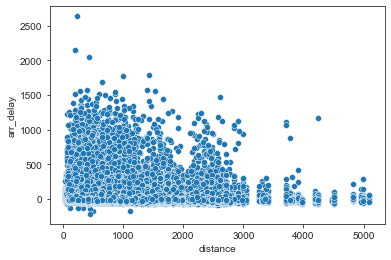

In [74]:
sns.scatterplot(x='distance', y='arr_delay', data=flights_df2)

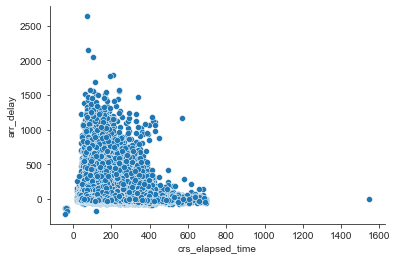

In [75]:
sns.scatterplot(x='crs_elapsed_time', y='arr_delay', data=flights_df2)
sns.despine()
plt.show()

In [76]:
flights_df2.groupby('month')[['arr_delay']].mean()

,arr_delay
month,
1,3.863922
2,6.670288
3,2.633671
4,4.062106
5,6.478135
6,10.360261
7,8.853192
8,9.011525
9,1.747201


In [77]:
flights_df2.groupby('op_unique_carrier')[['arr_delay']].mean()

,arr_delay
op_unique_carrier,
9E,3.817015
9K,-1.801887
AA,6.304913
AS,0.526382
AX,15.344080
B6,11.191761
C5,23.337295
CP,6.076859
DL,0.394422


In [78]:
def distance_bin(distance):
    if distance >= 0 and distance <=2500:
        return 0
    else:
        return 1 ##

In [79]:
flights_df2['distance_bin'] = flights_df2['distance'].map(distance_bin)

In [80]:
flights_df2.groupby(distance_bin)[['arr_delay']].mean()

,arr_delay
0,6.682708
1,5.433728


In [81]:
flights_df2['crs_elapsed_time'].describe()

count    979887.000000
mean        138.177117
std          71.768938
min         -42.000000
25%          87.000000
50%         119.000000
75%         168.000000
max        1547.000000
Name: crs_elapsed_time, dtype: float64

In [82]:
def flight_time(time):
    if time <= 180:
        return 0
    elif time > 180 and time <= 360:
        return 1
    else:
        return 2

In [83]:
flights_df2['flight_haul'] = flights_df2['crs_elapsed_time'].map(flight_time)

In [84]:
flights_df2.groupby('flight_haul')[['arr_delay']].mean()

,arr_delay
flight_haul,
0,5.831764
1,4.039286
2,1.411969


In [85]:
def get_time_desc(time):
    if time >= 1 and time <= 300:
        return 0
    elif time > 300 and time <= 600:
        return 1
    elif time > 600 and time <= 900:
        return 2
    elif time > 900 and time <= 1200:
        return 3
    elif time > 1200 and time <= 1500:
        return 4
    elif time > 1500 and time <= 1800:
        return 5
    elif time > 1800 and time <= 2100:
        return 6
    else:
        return 7

In [86]:
flights_df2['arr_time_desc'] = flights_df2['crs_arr_time'].map(get_time_desc)
flights_df2['dep_time_desc'] = flights_df2['crs_dep_time'].map(get_time_desc)

In [87]:
flights_df2['ori_dest'] = flights_df2['origin'] + flights_df2['dest']

In [88]:
route_df = flights_df2.groupby('ori_dest')[['arr_delay']].mean().reset_index().rename(columns={'arr_delay':'route_arr_delay'})

route_df.head()

,ori_dest,route_arr_delay
0,ABEATL,-1.188811
1,ABEBNA,60.500000
2,ABECLT,3.193798
3,ABEDTW,15.830508
4,ABEFLL,-6.272727


In [89]:
flights_df2 = pd.merge(flights_df2, route_df, on='ori_dest', how='inner')

In [90]:
def delay_class(route):
    if route <= 0:
        return 0
    elif route > 0 and route <= 30:
        return 1
    elif route > 30 and route <=90:
        return 2
    else:
        return 3

In [91]:
flights_df2['route_delay_class'] = flights_df2['route_arr_delay'].map(delay_class)

In [137]:
flights_df2.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,crs_dep_time,dep_delay,crs_arr_time,arr_delay,cancelled,...,year,month,day,distance_bin,flight_haul,arr_time_desc,dep_time_desc,ori_dest,route_arr_delay,route_delay_class
0,2018-03-31,UA,UA,EWR,FLL,1705,46.0,2017,38.0,0,...,2018,3,31,0,1,6,5,EWRFLL,14.963235,1
1,2018-08-06,WN,WN,EWR,FLL,1155,-4.0,1455,-22.0,0,...,2018,8,6,0,0,4,3,EWRFLL,14.963235,1
2,2018-02-14,NK,NK,EWR,FLL,2120,6.0,18,-19.0,0,...,2018,2,14,0,0,0,7,EWRFLL,14.963235,1
3,2018-04-26,WN,WN,EWR,FLL,545,-3.0,840,-14.0,0,...,2018,4,26,0,0,2,1,EWRFLL,14.963235,1
4,2018-05-24,B6,B6,EWR,FLL,1629,12.0,1939,-12.0,0,...,2018,5,24,0,1,6,5,EWRFLL,14.963235,1


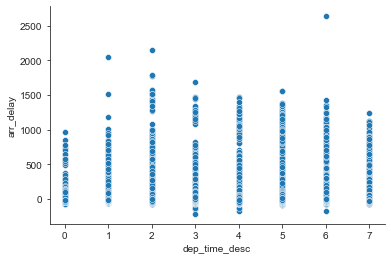

In [94]:
sns.scatterplot(x='dep_time_desc', y='arr_delay', data=flights_df2)
sns.despine()
plt.show()

In [95]:
bins = [0, 600, 1200, 1800, 2400]
flights_df2.groupby(pd.cut(flights_df2['crs_dep_time'], bins=bins))[['arr_delay']].mean()

,arr_delay
crs_dep_time,
"(0, 600]",-1.784573
"(600, 1200]",0.593249
"(1200, 1800]",8.185873
"(1800, 2400]",10.787563


In [ ]:
#normal weather, extreme weather, late aircraft, radar, cascade effect (Look at tail number, all the flights )

In [93]:
#flights_df2.to_csv('../data/flights_feature_engineering.csv')

In [100]:
flights_df.groupby('tail_num')[['arr_delay']].mean().sort_values('arr_delay', ascending=False)

,arr_delay
tail_num,
N725AN,539.000000
N2332U,299.000000
N2644U,178.250000
N77019,138.000000
N803NW,134.111111
...,...
N362PH,-26.000000
N361PH,-31.000000
N805NW,-32.000000


In [106]:
test = flights_df.groupby('tail_num')[['arr_delay']].size().reset_index().sort_values(0, ascending=False)

In [108]:
test[test['tail_num'] == 'N725AN']

,tail_num,0
3869,N725AN,1


In [110]:
flights_df.groupby(['fl_date', 'tail_num'])[['arr_delay']].size().reset_index()

,fl_date,tail_num,0
0,2018-01-01,220NV,1
1,2018-01-01,228NV,1
2,2018-01-01,230NV,1
3,2018-01-01,231NV,1
4,2018-01-01,232NV,2
...,...,...,...
875073,2019-12-31,N994AT,1
875074,2019-12-31,N994NN,1
875075,2019-12-31,N995JL,1
875076,2019-12-31,N998AT,1


In [125]:
test2 = flights_df.groupby(['fl_date', 'tail_num'])[['arr_delay']].size().reset_index()

In [126]:
test2[(test2['fl_date'].dt.strftime('%Y-%m-%d') >= '2018-01-01') & (test2['fl_date'].dt.strftime('%Y-%m-%d') <= '2018-01-04')]

,fl_date,tail_num,0
0,2018-01-01,220NV,1
1,2018-01-01,228NV,1
2,2018-01-01,230NV,1
3,2018-01-01,231NV,1
4,2018-01-01,232NV,2
...,...,...,...
4374,2018-01-04,N994AT,1
4375,2018-01-04,N995AN,1
4376,2018-01-04,N996DL,1
4377,2018-01-04,N998AT,1


In [120]:
dt.date(2018, 1,1)

datetime.date(2018, 1, 1)

In [135]:
flights_df[flights_df['fl_date'].dt.strftime('%Y-%m-%d') == '2018-01-01'].groupby('tail'[['tail_num', 'origin', 'dest']]

,tail_num,origin,dest
156,N441WN,PHX,SAT
437,N305DN,DCA,ATL
1009,N898NN,LAX,ORD
1569,N951DL,ATL,BUF
2439,N518AE,DAY,CLT
...,...,...,...
498779,N72405,IAH,PHX
498966,N945UW,LGA,ATL
499589,N913NN,TUL,CLT
499785,N710SK,DTW,ORD


<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

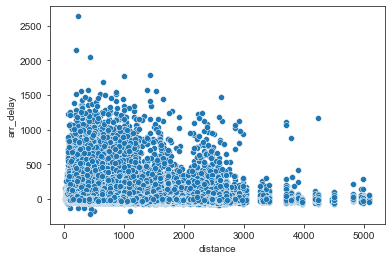

In [217]:
sns.scatterplot(x='distance', y='arr_delay', data=flights_df)

## Combine Weather Data 

In [4]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [5]:
connection = create_connection("../data/weather_db.sqlite")

Connection to SQLite DB successful


In [6]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [8]:
new_weather = pd.read_sql('SELECT * FROM weather', connection)

In [14]:
new_weather = new_weather[['IATA_code', 'date', 'avg_temp', 'total_snow_cm', 'windspeed_kmph', 'precipitation_mm', 'humidity', 'visibility', 'weather_description']]

In [16]:
new_weather['date'] = pd.to_datetime(new_weather['date'], format='%Y-%m-%d')

In [18]:
weather_df

,iata_code,date,avg_temp,precip_mm,humidity,visibility,windspeed_kmhr,total_snowcm,weather_description
0,ATL,2018-01-01,-14,0.0,45,10,12,0.0,Partly cloudy
1,ATL,2018-01-02,-9,0.0,36,10,9,0.0,Overcast
2,ATL,2018-01-03,-2,0.0,54,10,13,0.0,Sunny
3,ATL,2018-01-04,-2,0.0,56,10,11,0.0,Partly cloudy
4,ATL,2018-01-05,0,0.0,63,10,13,0.0,Sunny
...,...,...,...,...,...,...,...,...,...
6565,SEA,2019-12-27,1,0.0,78,10,2,0.0,Cloudy
6566,SEA,2019-12-28,1,0.0,73,10,1,0.0,Overcast
6567,SEA,2019-12-29,1,0.0,73,10,2,0.0,Partly cloudy
6568,SEA,2019-12-30,1,0.0,77,10,2,0.0,Partly cloudy


In [19]:
new_weather.head()

,IATA_code,date,avg_temp,total_snow_cm,windspeed_kmph,precipitation_mm,humidity,visibility,weather_description
0,BOS,2018-01-01,-14,0.0,18,0.0,65,10,Sunny
1,BOS,2018-01-02,-11,0.0,12,0.0,72,10,Overcast
2,BOS,2018-01-03,-6,0.0,8,0.0,73,10,Overcast
3,BOS,2018-01-04,-1,2.9,28,42.0,84,2,Heavy snow
4,BOS,2018-01-05,-13,0.5,25,0.6,76,7,Blowing snow


In [25]:
new_weather.rename(columns={'IATA_code':'iata_code', 'precipitation_mm': 'precip_mm', 'total_snow_cm': 'total_snowcm', 'windspeed_kmph':'windspeed_kmhr'}, inplace=True)

In [28]:
weather_df.shape

(6570, 9)

In [29]:
new_weather.shape

(7300, 9)

In [26]:
full_weather = pd.concat([weather_df, new_weather])

In [30]:
full_weather.to_csv('../data/complete_weather_df.csv')